In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
import spacy
import re

from tqdm.autonotebook import tqdm
tqdm.pandas()

<ipython-input-1-fb776cf97f93>:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [110]:
csv_path = 'all_cleaned.csv'
df_csv = pd.read_csv(csv_path, index_col=False)
df_csv = df_csv.loc[df_csv['label'] == 0]
df_csv.to_csv('all_nonhate.csv', index=False)

len(df_csv.index)

87379

In [3]:
nlp = spacy.load('en_core_web_md') # remove three tasks so as to speed up the precess 
nlp.max_length = 1100000

def nlp_preprocess(caption):
    doc = nlp(caption)
    lemmanized_list = []
    lemmanized_phrase = ''
    for token in doc:
        if not token.is_punct and not token.is_stop and not token.is_oov and token.lemma_ != "-PRON-": # check is token is not punctutation stop word and in the nlp vocab
            if token.pos_ == 'NOUN' or token.pos_ == 'PROPN' or (token.pos_ == 'VERB' and len(token.orth_) > 5):
                # print(token.orth_, token.pos_, token.lemma_.lower().strip())
                lemmanized_list.append(token.lemma_.lower().strip()) 
    lemmanized_phrase = ' '.join(lemmanized_list)

    doc = nlp(lemmanized_phrase)
    lemmanized_list = []
    for token in doc:
        if not token.is_punct and not token.is_stop and not token.is_oov and token.lemma_ != "-PRON-": # check is token is not punctutation stop word and in the nlp vocab
            if token.pos_ == 'NOUN' or token.pos_ == 'PROPN' or (token.pos_ == 'VERB' and len(token.orth_) > 5):
                # print(token.orth_, token.pos_, token.lemma_.lower().strip())
                lemmanized_list.append(token.lemma_.lower().strip())
    lemmanized_phrase = ' '.join(lemmanized_list)

    return lemmanized_phrase

In [4]:
phase = 'masks karns'
nlp_preprocess(phase)

'mask karn'

In [5]:
df_csv['image_text'] = df_csv['image_text'].fillna('')
df_csv['image_text'] = df_csv['image_text'].astype('string')
# df_csv['image_text'] = df_csv['image_text'].apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', ' ', x))
df_csv['image_text'] = df_csv['image_text'].progress_apply(nlp_preprocess)
# df_csv['image_text'] = df_csv['image_text'].apply(lambda x: ','.join([w for w in x.split()]))
df_csv['image_text'] = df_csv['image_text'].apply(lambda x: ','.join([w for w in x.split() if len(w)>2]))

  0%|          | 0/26685 [00:00<?, ?it/s]

In [6]:
df_csv.to_csv('all_hate_nlp.csv', index=False)

## Start

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

In [2]:
topic = 'all'
column = 'yolo'
csv_path = 'all_nonhate.csv'

df_csv = pd.read_csv(csv_path, index_col=False)
df_csv[column] = df_csv[column].fillna('')
df_csv[column] = df_csv[column].astype('string')

if topic != 'all':
    df_csv = df_csv.loc[df_csv['topic'] == topic]

In [3]:
obj_dict = {}

def count_objs(obj_str):
    if obj_str == '':
        return

    li = obj_str.split(',')
    for item in li:
        if item in obj_dict:
            obj_dict[item] += 1
        else:
            obj_dict[item] = 1

_ = df_csv[column].apply(count_objs)

In [4]:
N = 10
top_dict = dict(sorted(obj_dict.items(), key = itemgetter(1), reverse = True)[:N])

len_all = len(df_csv.index)
top_dict_per = {}

for key, val in top_dict.items():
    top_dict_per[key] = val / len_all

In [5]:
df_top_per = pd.DataFrame(top_dict_per.items(), columns=['Object', 'Percentage'])
csv_path = 'plot_data/yolo/nonhate_top_' + topic + '.csv'
df_top_per.to_csv(csv_path, index=False)

In [138]:
topic = 'all'
csv_path = 'plot_data/text_top_' + topic + '.csv'
df_top_per = pd.read_csv(csv_path, index_col=False)

In [139]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('whitegrid')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

<Figure size 640x480 with 0 Axes>

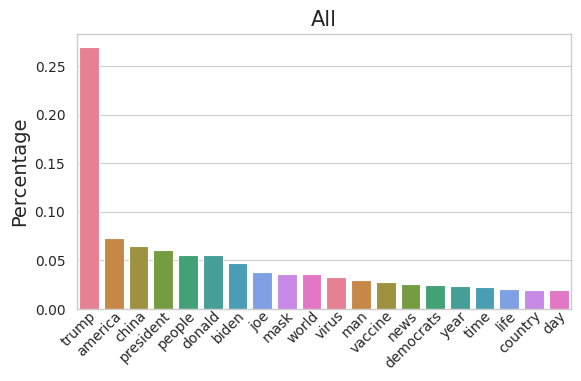

In [142]:
plt.clf()
plt.figure(figsize=(6,4), tight_layout=True)
# plt.bar(df_top_per.Object, df_top_per.Percentage, width=0.7)

ax = sns.barplot(data=df_top_per, x='Object', y='Percentage', palette=sns.color_palette('husl', 10))
ax.tick_params(axis='x', which='major', pad=-5)
plt.xticks(rotation=45, ha='right', rotation_mode="anchor")
plt.xlabel(None)
plt.title(topic.capitalize(), fontsize=15)

# plt.margins(0.2)
# plt.subplots_adjust(bottom=0.5)

fig_path = 'plot_data/plots/text_bar_' + topic + '.png'
plt.savefig(fig_path)
plt.show()


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
topics = ['ageism', 'asianhate', 'immigration', 'mask', 'politics', 'vaccine']
df_csvs = {}
for topic in topics:
    csv_path = 'plot_data/hashtag/hashtag_top_' + topic + '.csv'
    df = pd.read_csv(csv_path, index_col=False)
    df_csvs[topic] = df

In [32]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('whitegrid')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

<Figure size 640x480 with 0 Axes>

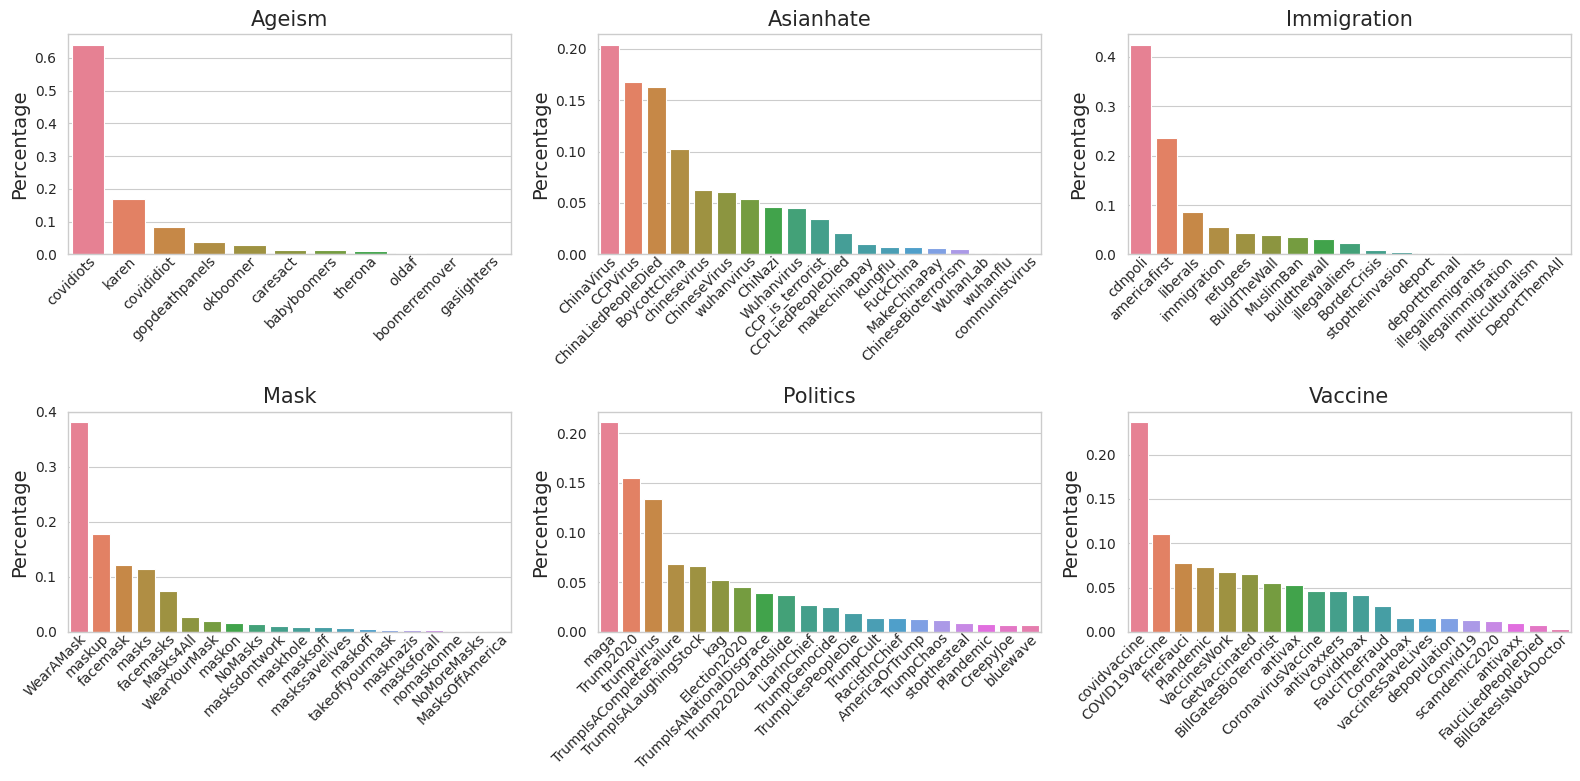

In [35]:
plt.clf()
fig, axes = plt.subplots(2, 3, figsize=(16, 8), tight_layout=True)

for idx, topic in enumerate(topics):
    i = int(idx / 3)
    j = idx % 3
    
    df = df_csvs[topic]

    # ax[i][j].pie(df['percentage_norm'], labels=df['Object'], colors=sns.color_palette('pastel', 10), autopct='%1.1f%%', shadow=True)
    # ax[i][j].set_title(topic.capitalize(), fontsize=18)
    # plt.setp(ax[i][j].get_xticklabels(), ha='center', va='center', ma='center')

    ax = sns.barplot(ax=axes[i][j], data=df, x='Object', y='Percentage', palette=sns.color_palette('husl', 20))
    ax.tick_params(axis='x', which='major', pad=-5)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    axes[i][j].set_xlabel(None)
    axes[i][j].set_title(topic.capitalize(), fontsize=15)
    

fig_path = 'plot_data/hashtag/hashtag_bar_combined.png'
plt.savefig(fig_path)
plt.show()

## Pie Chart

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
topics = ['ageism', 'asianhate', 'immigration', 'mask', 'politics', 'vaccine']
df_csvs = {}
for topic in topics:
    csv_path = 'plot_data/text_top_' + topic + '.csv'
    df = pd.read_csv(csv_path, index_col=False)
    df = df[:10]
    per_total = df['Percentage'].sum()
    df['percentage_norm'] = df['Percentage'].apply(lambda x: x / per_total)
    df_csvs[topic] = df

In [104]:
topic = 'all'
csv_path = 'plot_data/text/text_top_' + topic + '.csv'
df_top_per = pd.read_csv(csv_path, index_col=False)
df_top_per = df_top_per[:10]

In [105]:
per_total = df_top_per['Percentage'].sum()
df_top_per['percentage_norm'] = df_top_per['Percentage'].apply(lambda x: x / per_total)

In [106]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('white')
# plt.rcParams['font.family'] = 'Times New Roman'
tfont = {'fontname':'Times New Roman'}

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)      

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<Figure size 432x288 with 0 Axes>

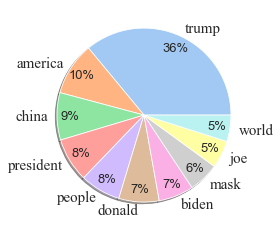

In [108]:
plt.clf()
plt.figure(figsize=(5,4), tight_layout=False)

# color = sns.light_palette((0, 76, 73), input="husl", reverse=True, n_colors=10)
color = sns.color_palette("pastel", 10)

_, ax, autopcts = plt.pie(
    df_top_per['percentage_norm'], labels=df_top_per['Object'], colors=color,
    autopct='%1.0f%%', shadow=True,
    pctdistance=0.85, radius=1
)

for lab in ax:
    lab.set_fontfamily('Times New Roman')

# plt.title(topic.capitalize(), fontsize=18, y=-0.12, **tfont)

# plt.setp(autopcts, **{'fontsize':10})
# plt.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)
# plt.title(topic.capitalize(), fontsize=18)


fig_path = 'plot_data/text/text_pie_' + topic + '.eps'
plt.savefig(fig_path, format='eps', transparent=True)
plt.show()

In [191]:
topics = ['all', 'ageism', 'asianhate', 'immigration', 'mask', 'politics', 'vaccine']
for topic in topics:
    csv_path = 'plot_data/text_top_' + topic + '.csv'
    df_top_per = pd.read_csv(csv_path, index_col=False)
    df_top_per = df_top_per[:10]
    per_total = df_top_per['Percentage'].sum()
    df_top_per['percentage_norm'] = df_top_per['Percentage'].apply(lambda x: x / per_total)

    plt.clf()
    plt.figure(figsize=(5,3.8), tight_layout=False)

    _, ax, autopcts = plt.pie(
        df_top_per['percentage_norm'], labels=df_top_per['Object'], colors=sns.color_palette('pastel', 10),
        autopct='%1.1f%%', shadow=True,
        pctdistance=0.85, radius=1.1
    )
    plt.setp(autopcts, **{'fontsize':10})
    # plt.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)
    # plt.title(topic.capitalize(), fontsize=18)


    fig_path = 'plot_data/plots/text/text_pie_' + topic + '.png'
    plt.savefig(fig_path)

In [96]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('white')
# plt.rcParams['font.family'] = 'Times New Roman'
tfont = {'fontname':'Times New Roman'}

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)      

In [79]:
sns.choose_light_palette(input='husl')

interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

[(0.928400678190116, 0.9478103788759907, 0.944453036504835),
 (0.8628220913788363, 0.8970612077691371, 0.8916872171349329),
 (0.7972435045675565, 0.8463120366622834, 0.8389213977650309),
 (0.7293228253701598, 0.7937503951587563, 0.7842710848462038),
 (0.6637442385588801, 0.7430012240519027, 0.7315052654763018),
 (0.5958235593614833, 0.6904395825483758, 0.6768549525574746),
 (0.5302449725502036, 0.639690411441522, 0.6240891331875726),
 (0.46232429335280684, 0.587128769937995, 0.5694388202687455),
 (0.3967457065415272, 0.5363795988311414, 0.5166730008988434),
 (0.33116711973024743, 0.4856304277242877, 0.46390718152894134)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<Figure size 432x288 with 0 Axes>

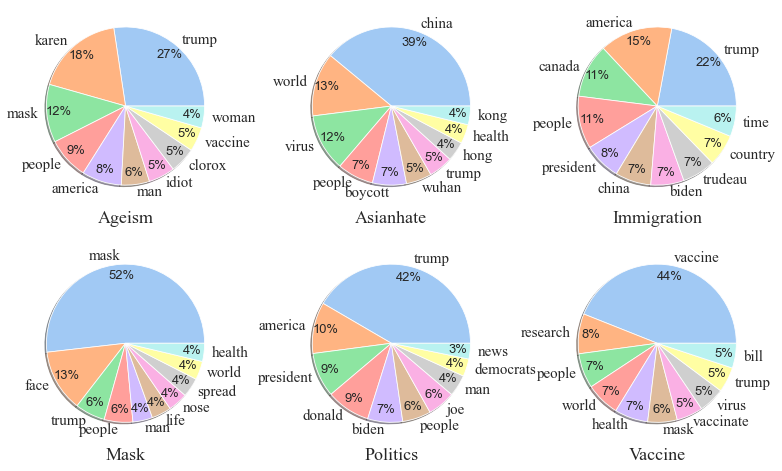

In [103]:
plt.clf()
fig, ax = plt.subplots(2, 3, figsize=(13.5, 8), tight_layout=False)
topics = ['ageism', 'asianhate', 'immigration', 'mask', 'politics', 'vaccine']
# color_h_list = [52, 104, 156, 208, 260, 312]
# color_h = dict(zip(topics, color_h_list))

for idx, topic in enumerate(topics):
    i = int(idx / 3)
    j = idx % 3
    csv_path = 'plot_data/text/text_top_' + topic + '.csv'
    df_top_per = pd.read_csv(csv_path, index_col=False)
    df_top_per = df_top_per[:10]
    per_total = df_top_per['Percentage'].sum()
    df_top_per['percentage_norm'] = df_top_per['Percentage'].apply(lambda x: x / per_total)

    # color = sns.light_palette((color_h[topic], 76, 73), input="husl", reverse=True, n_colors=10)
    # color = reversed(sns.color_palette('light:#5A9', n_colors=10))
    color = sns.color_palette("pastel", 10)
    wedges, labels, autopct = ax[i][j].pie(
        df_top_per['percentage_norm'], labels=df_top_per['Object'], colors=color,
        autopct='%1.0f%%', shadow=True,
        pctdistance=0.85, radius=1
    )
    for lab in labels:
        lab.set_fontfamily('Times New Roman')
    ax[i][j].set_title(topic.capitalize(), fontsize=18, y=-0.12, **tfont)
    plt.setp(ax[i][j].get_xticklabels(), ha='center', va='center', ma='center')

fig_path = 'plot_data/text/text_pie_combined.eps'
plt.savefig(fig_path, format='eps', transparent=True)
plt.show()

# Sentiment analysis

## Compound

In [33]:
import ast
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [34]:
topic = 'all'
csv_path = 'all_hate_nlp.csv'
df_csv = pd.read_csv(csv_path, index_col=False)

In [35]:
def get_senti_scores(entry_str):
    dic = ast.literal_eval(entry_str)
    neg.append(dic['neg'])
    neu.append(dic['neu'])
    pos.append(dic['pos'])
    compound.append(dic['compound'])

In [36]:
df_scores = pd.DataFrame()
topics = ['ageism', 'asianhate', 'immigration', 'mask', 'politics', 'vaccine']
for topic in topics:
    prefix = topic + '_'
    if topic != 'all':
        df = df_csv.loc[df_csv['topic'] == topic]
    else:
        df = df_csv

    neg = []
    neu = []
    pos = []
    compound = []

    df_neg = pd.DataFrame()
    df_neu = pd.DataFrame()
    df_pos = pd.DataFrame()
    df_compound = pd.DataFrame()
    _ = df['vader'].apply(get_senti_scores)

    df_neg[prefix + 'neg'] = neg
    df_neu[prefix + 'neu'] = neu
    df_pos[prefix + 'pos'] = pos
    df_compound[prefix + 'compound'] = compound
    df_scores = pd.concat([df_scores, df_neg, df_neu, df_pos, df_compound], axis=1)


In [38]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('white')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

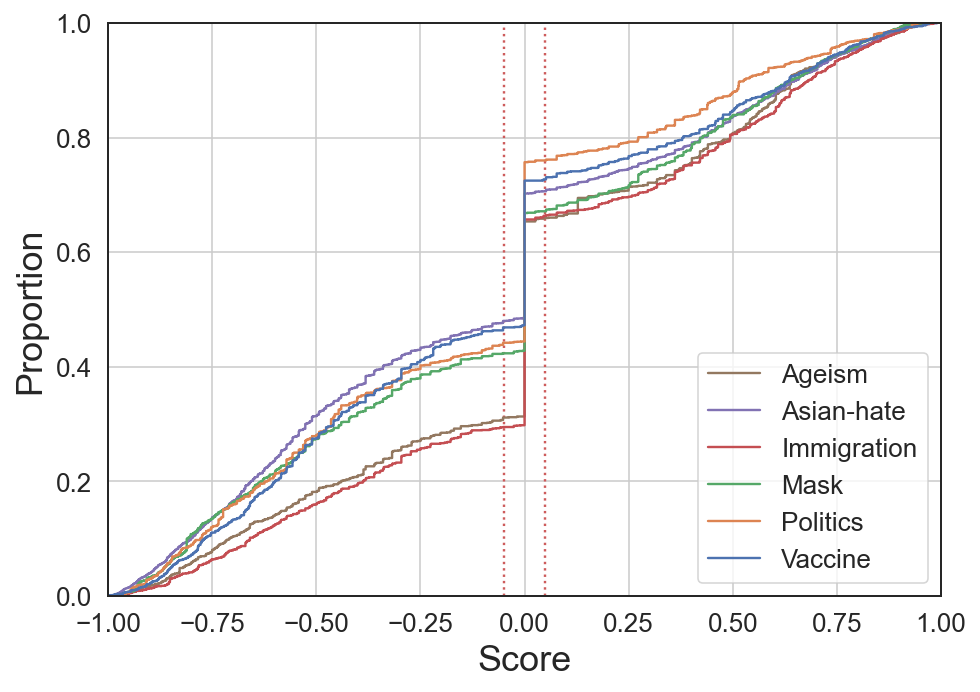

In [39]:
plt.clf()
plt.figure(figsize=(7,5), dpi=144, tight_layout=True)
topics = ['Ageism', 'Asian-hate', 'Immigration', 'Mask', 'Politics', 'Vaccine']

plt.axvline(x=-0.05, color='indianred', linestyle='dotted', label='_nolegend_')
plt.axvline(x=0.05, color='indianred', linestyle='dotted', label='_nolegend_')

# ax = sns.ecdfplot(data=df_scores.filter(items=['neg', 'neu', 'pos']))
ax = sns.ecdfplot(data=df_scores.filter(like="_compound", axis="columns"), palette=sns.color_palette('deep', 6))

ax.legend(topics, loc=4)
ax.set_xlim([-1, 1])

plt.xlabel('Score')
# plt.title(topic.capitalize(), fontsize=18)
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

fig_path = 'plot_data/senti/senti_cdf_compound_combined.eps'
plt.savefig(fig_path, format='eps', transparent=True)
plt.show()

## neg, neu, pos

In [2]:
import ast
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('whitegrid')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [4]:
topic = 'all'
csv_path = 'all_hate_nlp.csv'
df_csv = pd.read_csv(csv_path, index_col=False)
if topic != 'all':
    df_csv = df_csv.loc[df_csv['topic'] == topic]

In [5]:
neg = []
neu = []
pos = []
compound = []

def get_senti_scores(entry_str):
    dic = ast.literal_eval(entry_str)
    neg.append(dic['neg'])
    neu.append(dic['neu'])
    pos.append(dic['pos'])
    compound.append(dic['compound'])

In [6]:
_ = df_csv['vader'].apply(get_senti_scores)

In [7]:
# scores_sorted = np.sort(scores)
# y = np.arange(len(scores)) / float(len(scores))
df_scores = pd.DataFrame(list(zip(neg, neu, pos, compound)), columns=['neg', 'neu', 'pos', 'compound'])

<Figure size 640x480 with 0 Axes>

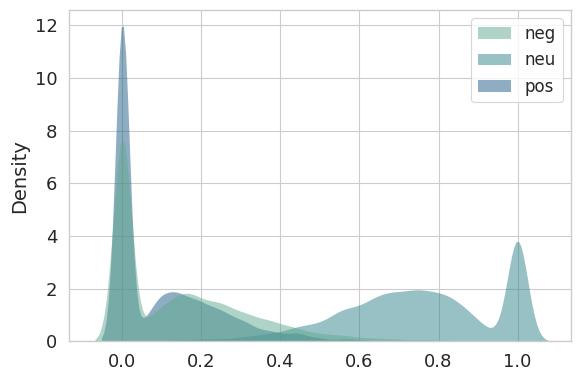

In [10]:

plt.clf()
plt.figure(figsize=(6,4), tight_layout=True)

# ax = sns.ecdfplot(data=df_scores.filter(items=['neg', 'neu', 'pos']))
ax = sns.kdeplot(
    data=df_scores.filter(items=['neg', 'neu', 'pos']),
    fill=True, common_norm=False, palette="crest",
    alpha=.5, linewidth=0,
)

# plt.xlabel('Score')
# plt.title(topic.capitalize(), fontsize=18)


# fig_path = 'plot_data/plots/senti/senti_cdf_' + topic + '.png'
# plt.savefig(fig_path)
plt.show()


# Hashtags

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [115]:
topics = ['ageism', 'asianhate', 'immigration', 'mask', 'politics', 'vaccine']
quarters = ['2020-02', '2020-04', '2020-08', '2020-12', '2021-02', '2021-04']

csv_path = 'all_hate_nlp.csv'
df_csv = pd.read_csv(csv_path, index_col=False)

In [67]:
for topic in topics:
    csv_path = 'plot_data/hashtag/hashtag_top_' + topic + '.csv'
    df_top = pd.read_csv(csv_path, index_col=False)
    hashtag_list = df_top['Object'][:5].tolist()

    df_count = pd.DataFrame(quarters, columns=['quarter'])
    df_percent = pd.DataFrame(quarters, columns=['quarter'])
    len_topic = len(df_csv.loc[df_csv['topic'] == topic].index)
    # len_topic = len(df_csv.index)
    for hashtag in hashtag_list:
        freq_list = []
        percent_list = []
        for quarter in quarters:
            df_hashtag = df_csv.loc[(df_csv['topic'] == topic) & \
                                    (df_csv['hashtag'] == hashtag) & \
                                    (df_csv['time'] == quarter)]
            
            freq_list.append(len(df_hashtag.index))
            percent_list.append(len(df_hashtag.index) / len_topic)
        df_count[hashtag] = freq_list
        df_percent[hashtag] = percent_list
    csv_path = 'plot_data/hashtag_time/hashtag_time_' + topic + '.csv'
    df_count.to_csv(csv_path, index=False)
    csv_path = 'plot_data/hashtag_time/hashtag_perc_' + topic + '.csv'
    df_percent.to_csv(csv_path, index=False)

In [116]:
df_csvs = {}
for topic in topics:
    csv_path = 'plot_data/hashtag_time/hashtag_perc_' + topic + '.csv'
    df = pd.read_csv(csv_path, index_col=False)
    df_csvs[topic] = df

In [117]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('white')
# plt.rcParams['font.family'] = 'Times New Roman'
tfont = {'fontname':'Times New Roman'}

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
plt.rc('font', size=13)      

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<Figure size 432x288 with 0 Axes>

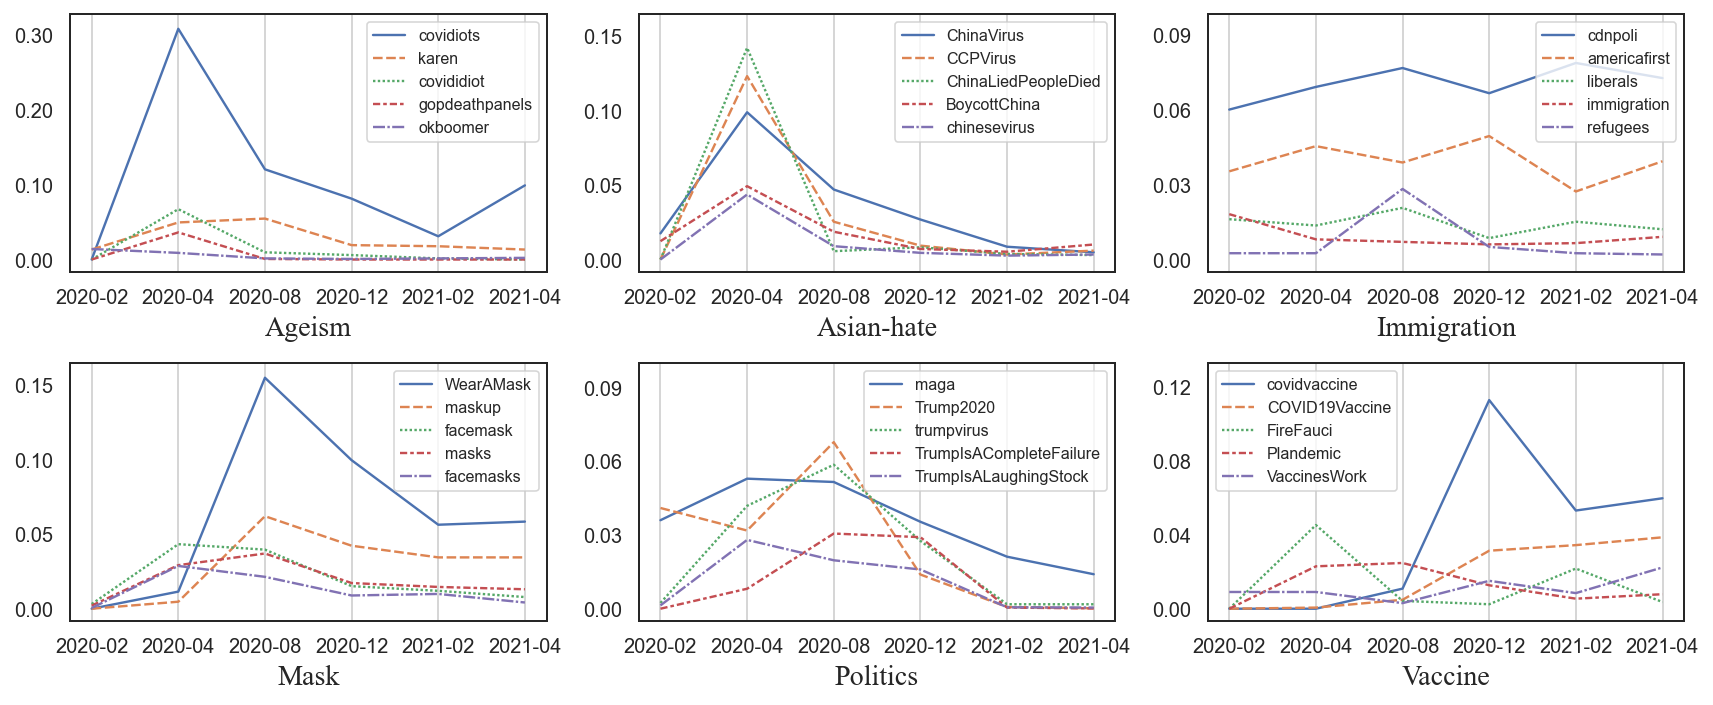

In [118]:
%matplotlib inline
quarters = ['2020-02', '2020-04', '2020-08', '2020-12', '2021-02', '2021-04']
plt.clf()
fig, axes = plt.subplots(2, 3, figsize=(12, 5), dpi=144, tight_layout=True)

for idx, topic in enumerate(topics):
    i = int(idx / 3)
    j = idx % 3
    df = df_csvs[topic]

    # ax[i][j].pie(df['percentage_norm'], labels=df['Object'], colors=sns.color_palette('pastel', 10), autopct='%1.1f%%', shadow=True)
    # ax[i][j].set_title(topic.capitalize(), fontsize=18)
    # plt.setp(ax[i][j].get_xticklabels(), ha='center', va='center', ma='center')
    ax = sns.lineplot(ax=axes[i][j], data=df,palette=sns.color_palette('deep', 5))
    # ax.tick_params(axis='x', which='major', pad=6)
    # plt.setp(ax.get_xticklabels(), rotation=30, ha='center', rotation_mode='anchor')
    # ax.set_ylim([0, 0.16])
    # if topic == 'immigration':
    #     ax.legend(loc=(0.68, 0.51))

    if topic == 'ageism':
        axes[i][j].set_ylim([-0.05*0.328, 0.328])
        axes[i][j].set_yticks(np.arange(0, 0.4, 0.1))
    elif topic == 'asianhate':
        axes[i][j].set_ylim([-0.05*0.165, 0.165])
        axes[i][j].set_yticks(np.arange(0, 0.20, 0.05))
    elif topic == 'immigration':
        axes[i][j].set_ylim([-0.05*0.0985, 0.0985])
        axes[i][j].set_yticks(np.arange(0, 0.1, 0.03))
    elif topic == 'mask':
        axes[i][j].set_ylim([-0.05*0.165, 0.165])
        axes[i][j].set_yticks(np.arange(0, 0.2, 0.05))
    elif topic == 'politics':
        axes[i][j].set_ylim([-0.05*0.1, 0.1])
        axes[i][j].set_yticks(np.arange(0, 0.1, 0.03))
    elif topic == 'vaccine':
        axes[i][j].set_ylim([-0.05*0.133, 0.133])
        axes[i][j].set_yticks(np.arange(0, 0.15, 0.04))
    # if topic == 'mask':
    #     ax.legend(fontsize=9)

    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axes[i][j].set_xticks(np.arange(len(quarters)))
    axes[i][j].set_xticklabels(quarters)
    axes[i][j].set_xlabel(topic.capitalize(), fontsize=14, **tfont)
    if topic == 'asianhate':
        axes[i][j].set_xlabel('Asian-hate', fontsize=14, **tfont)
    # axes[i][j].set_title(topic.capitalize(), fontsize=15)
    ax.yaxis.grid(False) # Hide the horizontal gridlines
    ax.xaxis.grid(True) # Show the vertical gridlines
    

fig_path = 'plot_data/hashtag_time/hashtag_perc_combined.eps'
plt.savefig(fig_path, format='eps', transparent=True)
plt.show()

# EFA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from factor_analyzer import FactorAnalyzer

In [2]:
topics = ['ageism', 'asianhate', 'immigration', 'mask', 'politics', 'vaccine']
column = 'image_text'

csv_path = 'all_hate_nlp.csv'
df_csv = pd.read_csv(csv_path, index_col=False)
df_csv[column] = df_csv[column].fillna('')
df_csv[column] = df_csv[column].astype('string')

In [3]:
df_efa = pd.DataFrame(df_csv['id'], columns=['id'])

for topic in topics:
    csv_path = 'plot_data/text/text_top_' + topic + '.csv'
    df_kw = pd.read_csv(csv_path, index_col=False)
    kw_list = df_kw['Object'][:10].tolist()

    df_efa[topic] = df_csv['image_text'].apply(lambda x: 1 if len(set(kw_list) & set(x.split(','))) > 0 else 0)

csv_path = 'plot_data/efa/efa.csv'
df_efa.to_csv(csv_path, index=False)

In [3]:
csv_path = 'plot_data/efa/efa.csv'
df = pd.read_csv(csv_path, index_col=False)

In [4]:
df.drop(['id'],axis=1,inplace=True)

In [28]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(139228.96772621182, 0.0)

In [5]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [6]:
kmo_model

0.7994802638561234

In [7]:
len(df.columns)

6

In [6]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation=None)
fa.fit(df)
# Check Eigenvalues
ev, cev = fa.get_eigenvalues()
v, pv, cv = fa.get_factor_variance()

In [91]:
pv

array([0.69447925, 0.10184947, 0.05853048, 0.01166994, 0.00149779,
       0.        ])

In [31]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('white')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)   

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

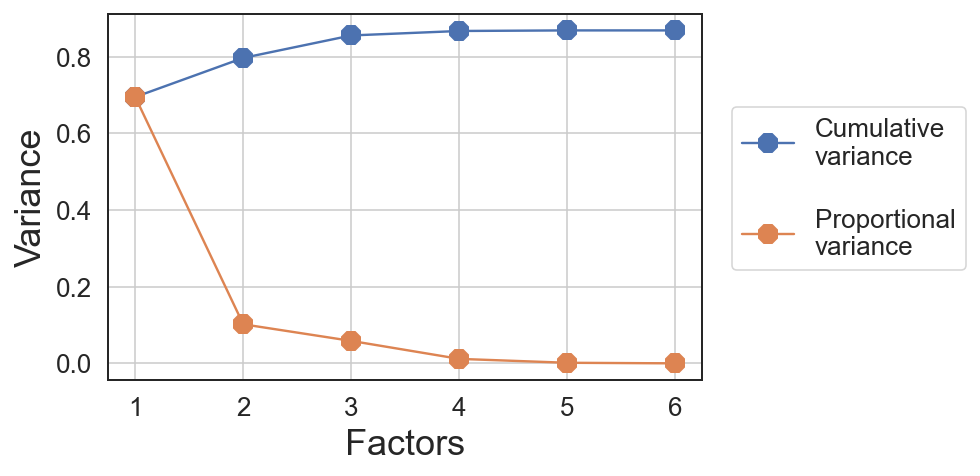

In [32]:
plt.clf()

plt.figure(figsize=(7,3.5), dpi=144, tight_layout=True)

# plt.scatter(range(1, df.shape[1]+1), cv)
plt.plot(range(1, df.shape[1]+1), cv, label='Cumulative\nvariance', marker='8', markersize=10)
# plt.scatter(range(1, df.shape[1]+1), pv)
plt.plot(range(1, df.shape[1]+1), pv, label='Proportional\nvariance', marker='8', markersize=10)
plt.legend(loc=(1.05, 0.3), labelspacing=1.5)
# plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Variance')
plt.grid()

fig_path = 'plot_data/efa/efa_scree.eps'
plt.savefig(fig_path, format='eps', transparent=True)
plt.show()

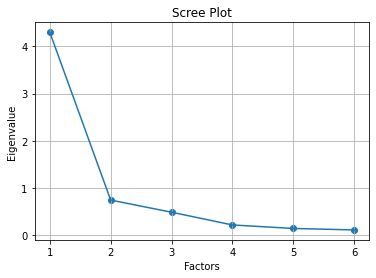

In [9]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [8]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('white')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
# plt.rc('ztick', labelsize=14)
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('font', size=13)      

In [5]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(df)
fa.loadings_

array([[0.73555539, 0.47566342, 0.12597846],
       [0.41359055, 0.34269727, 0.841496  ],
       [0.21562528, 0.76779757, 0.39944364],
       [0.76071576, 0.30617055, 0.37058972],
       [0.36672832, 0.8237527 , 0.14860394],
       [0.78692667, 0.20313395, 0.47647683]])

In [78]:
fa.get_factor_variance()

(array([2.09102485, 1.74678253, 1.26999134]),
 array([0.34850414, 0.29113042, 0.21166522]),
 array([0.34850414, 0.63963456, 0.85129979]))

In [6]:
topics = ['ageism', 'asianhate', 'immigration', 'mask', 'politics', 'vaccine']
df_loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=topics)
# df_loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=topics)
df_loadings

,Factor 1,Factor 2,Factor 3
ageism,0.735555,0.475663,0.125978
asianhate,0.413591,0.342697,0.841496
immigration,0.215625,0.767798,0.399444
mask,0.760716,0.306171,0.370590
politics,0.366728,0.823753,0.148604
vaccine,0.786927,0.203134,0.476477


<Figure size 432x288 with 0 Axes>

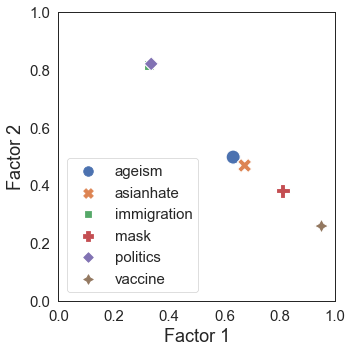

In [74]:
%matplotlib inline
plt.close('all')
plt.clf()
plt.figure(figsize=(5,5), tight_layout=True)

ax = sns.scatterplot(data=df_loadings, x='Factor 1', y='Factor 2', \
                     hue=df_loadings.index, style=df_loadings.index, s=200)

ax.legend(markerscale=2, loc=(0.03, 0.03))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig_path = 'plot_data/efa/efa_2.png'
plt.savefig(fig_path)
plt.show()

<Figure size 432x288 with 0 Axes>

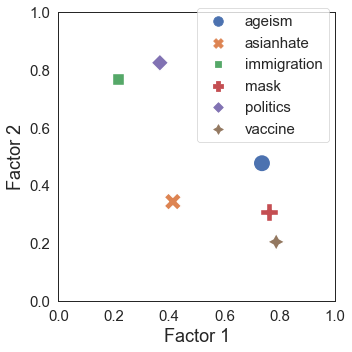

In [63]:
%matplotlib inline
plt.close('all')
plt.clf()
plt.figure(figsize=(5,5), tight_layout=True)

ax = sns.scatterplot(data=df_loadings, x='Factor 1', y='Factor 2', \
                     hue=df_loadings.index, style=df_loadings.index, s=300)

ax.legend(markerscale=2, loc=(0.5, 0.55))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig_path = 'plot_data/efa/efa_3_12.png'
plt.savefig(fig_path)
plt.show()

<Figure size 432x288 with 0 Axes>

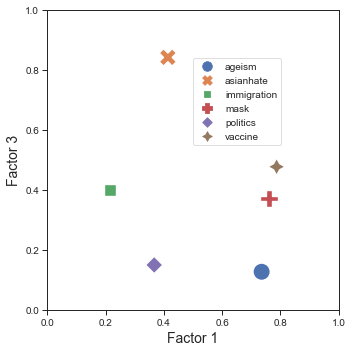

In [56]:
%matplotlib inline
plt.close('all')
plt.clf()
plt.figure(figsize=(5,5), tight_layout=True)

ax = sns.scatterplot(data=df_loadings, x='Factor 1', y='Factor 3', \
                     hue=df_loadings.index, style=df_loadings.index, s=300)

ax.legend(markerscale=2, loc=(0.5, 0.55))

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig_path = 'plot_data/efa/efa_3_13.png'
plt.savefig(fig_path)
plt.show()

<Figure size 432x288 with 0 Axes>

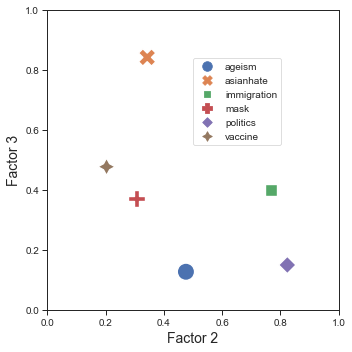

In [57]:
%matplotlib inline
plt.close('all')
plt.clf()
plt.figure(figsize=(5,5), tight_layout=True)

ax = sns.scatterplot(data=df_loadings, x='Factor 2', y='Factor 3', \
                     hue=df_loadings.index, style=df_loadings.index, s=300)

ax.legend(markerscale=2, loc=(0.5, 0.55))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig_path = 'plot_data/efa/efa_3_23.png'
plt.savefig(fig_path)
plt.show()

In [80]:
df_loadings

,Factor 1,Factor 2,Factor 3
ageism,0.735555,0.475663,0.125978
asianhate,0.413591,0.342697,0.841496
immigration,0.215625,0.767798,0.399444
mask,0.760716,0.306171,0.370590
politics,0.366728,0.823753,0.148604
vaccine,0.786927,0.203134,0.476477


In [7]:
sns.set_theme()
sns.set_context('paper')
sns.set_style('white')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
# plt.rc('ztick', labelsize=14)
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('font', size=13)      

TypeError: float() argument must be a string or a number, not 'Ellipse'

<Figure size 432x288 with 0 Axes>

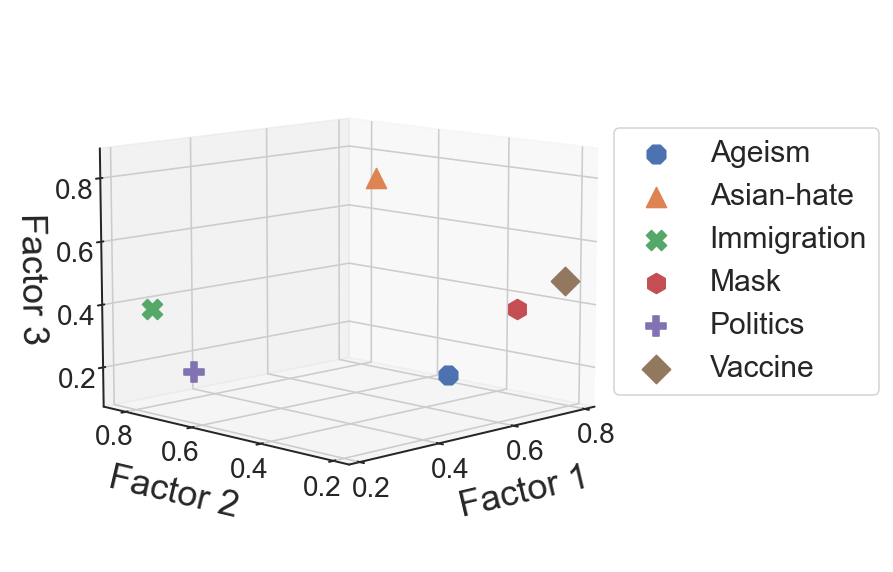

In [21]:
%matplotlib inline
from matplotlib.patches import Ellipse

plt.clf()
fig = plt.figure(figsize=(8,5), dpi=144, tight_layout=False)
plt.clf()
ax = fig.add_subplot(projection='3d')
markers = ['8', '^', 'X', 'h', 'P', 'D']
topics = ['Ageism', 'Asian-hate', 'Immigration', 'Mask', 'Politics', 'Vaccine']


for (idx, row), marker in zip(df_loadings.iterrows(), markers):

    ax.scatter(row['Factor 1'], row['Factor 2'], row['Factor 3'],\
                marker=marker, label=idx, s=100)

ax.legend(topics, loc=(1, 0.3))
ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')
ax.set_zlabel('Factor 3', labelpad=-1)
# ax.set_xlim([0.1, 1])
# ax.set_ylim([0.1, 1])
# ax.set_zlim([0.1, 1])

plt.locator_params(nbins=4)
ax.tick_params(axis='x', which='major', pad=-2)
ax.tick_params(axis='y', which='major', pad=-2)
ax.tick_params(axis='z', which='major', pad=-0.5)

ax.view_init(elev=10., azim=225)

# ax2 = fig.add_subplot()
ell = Ellipse(xy=[1,1], width=30, height=40, angle=30, edgecolor='r', fc='None', lw=2)
plt.plot(0, ell)



fig_path = 'plot_data/efa/efa_3d.svg'
plt.savefig(fig_path, format='svg', transparent=True)

plt.show()

In [13]:
np.random.rand(2) * 10

array([0.87213832, 1.71519659])

In [ ]:
import numpy as np

In [ ]:
topics = ['ageism', 'asianhate', 'immigration', 'mask', 'politics', 'vaccine']
pathes = ['hashtag_list/general', 'hashtag_list/hateful']

general = []
hateful = []

for path in pathes:
    for topic in topics:
        filename = path + '/' + topic
        with open(filename) as file:
            lines = file.readlines()
            lines = [line.rstrip() for line in lines]
        
        if path == 'hashtag_list/general':
            general.extend(lines)
        else:
            hateful.extend(lines)

# print(general)
print(len(general))
print(len(hateful))

general.extend(hateful)
print(general)
print(len(set(general)))

In [16]:
topic = 'vaccine'
csv_path = 'plot_data/yolo/yolo_top_' + topic + '.csv'
df_csv = pd.read_csv(csv_path, index_col=False)

print(df_csv['Object'].to_list())

['person', 'tie', 'bottle', 'chair', 'tvmonitor', 'cell phone', 'cup', 'car', 'bowl', 'book']
